# Real Estate Price Prediction using Linear Regression
In this notebook, we'll analyze real estate data and build a linear regression model to predict house prices based on various features.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Loading and Initial Exploration

In [6]:
# Load the dataset
df = pd.read_csv('Real estate.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

First few rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  

## 2. Data Preprocessing

In [7]:
# Drop the 'No' column as it's just an index
df = df.drop('No', axis=1)

# Rename columns for better readability
df.columns = ['transaction_date', 'house_age', 'distance_to_mrt', 'convenience_stores', 
              'latitude', 'longitude', 'price_per_unit']

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
transaction_date      0
house_age             0
distance_to_mrt       0
convenience_stores    0
latitude              0
longitude             0
price_per_unit        0
dtype: int64


## 3. Exploratory Data Analysis

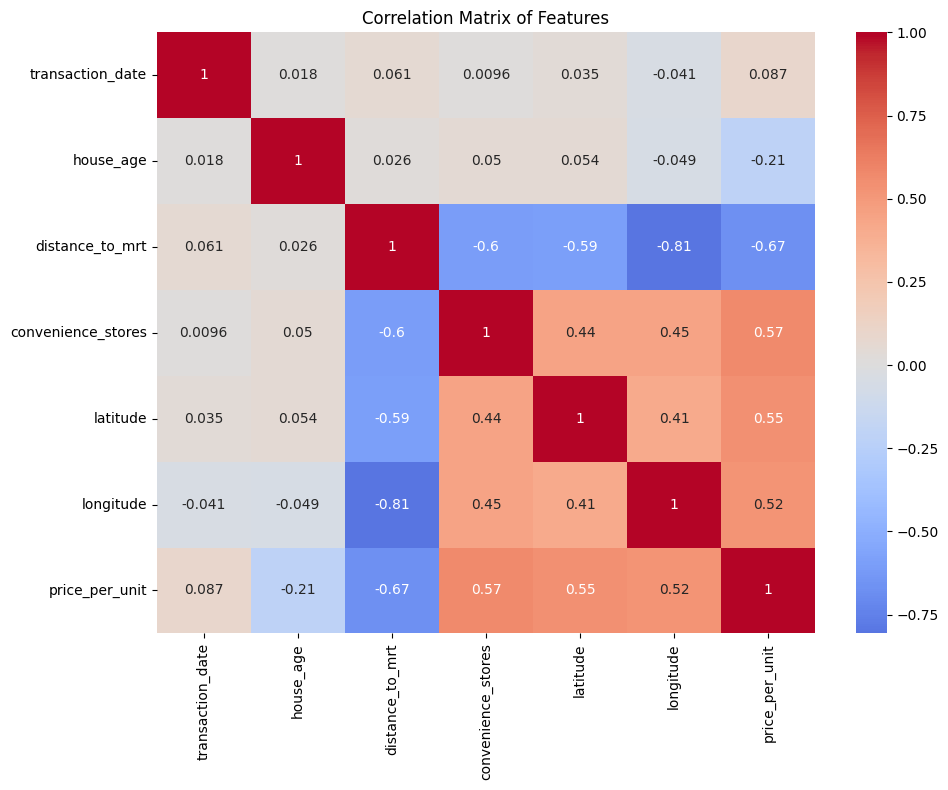

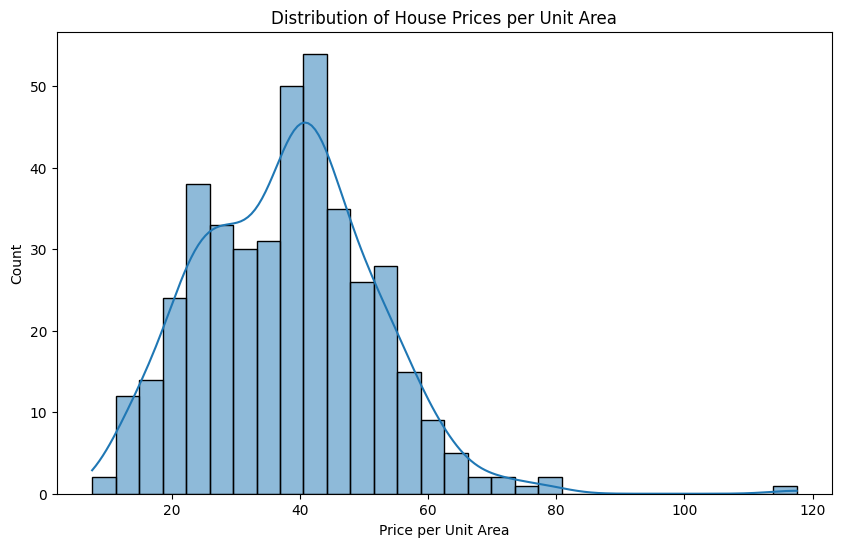

In [9]:
# Set up the plotting style


# Create correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_unit'], bins=30, kde=True)
plt.title('Distribution of House Prices per Unit Area')
plt.xlabel('Price per Unit Area')
plt.ylabel('Count')
plt.show()

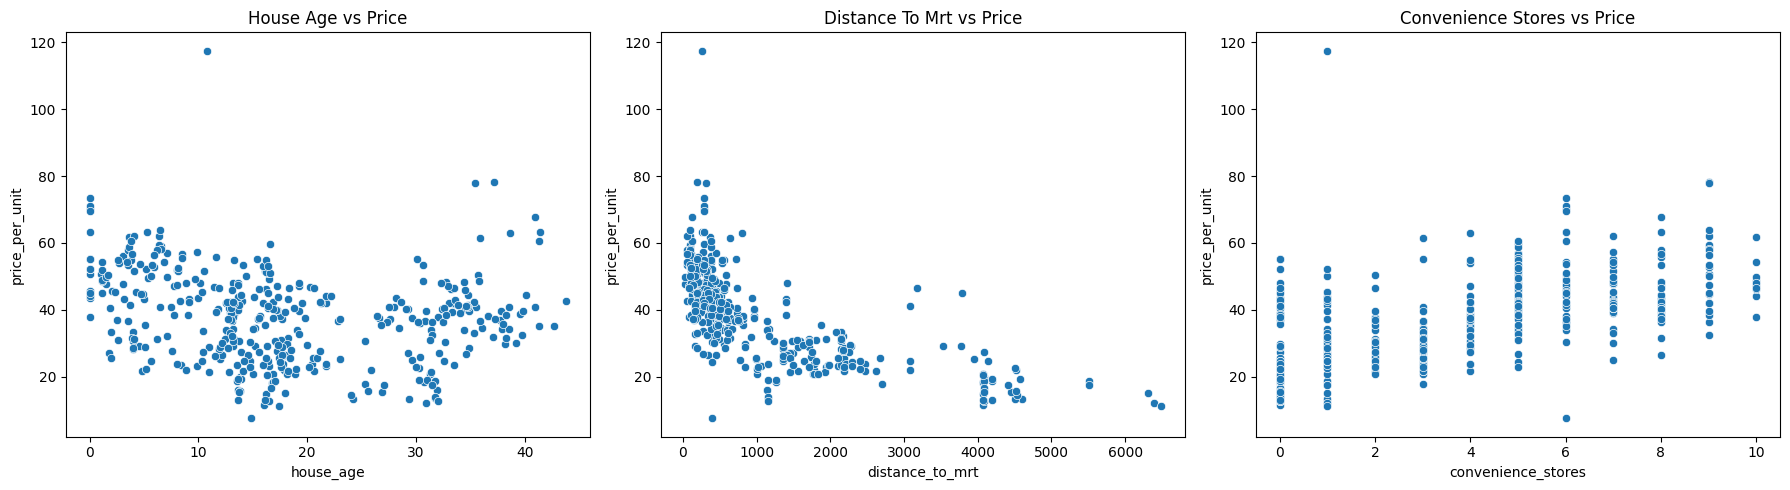

In [10]:
# Scatter plots of key features vs price
features = ['house_age', 'distance_to_mrt', 'convenience_stores']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='price_per_unit', ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Price')
plt.tight_layout()
plt.show()

## 4. Linear Regression Model

In [12]:
# Prepare features and target variable
X = df[['house_age', 'distance_to_mrt', 'convenience_stores', 'latitude', 'longitude']]
y = df['price_per_unit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Display feature coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coef_df)

Model Performance:
Mean Squared Error: 54.58
R-squared Score: 0.67

Feature Coefficients:
              Feature  Coefficient
0           house_age    -0.270593
1     distance_to_mrt    -0.004552
2  convenience_stores     1.105121
3            latitude   236.092831
4           longitude   -23.903694


## 5. Model Evaluation

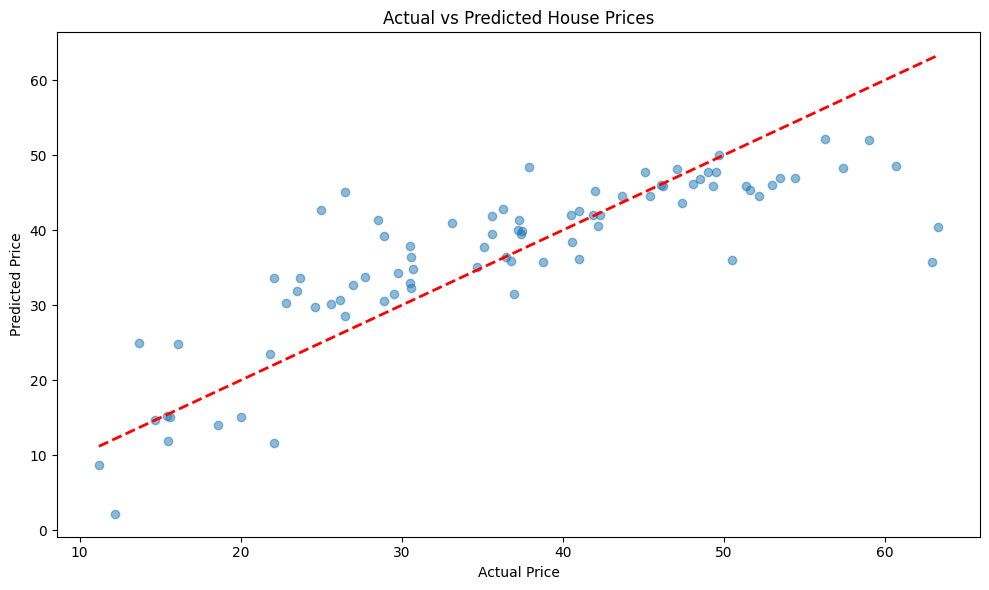

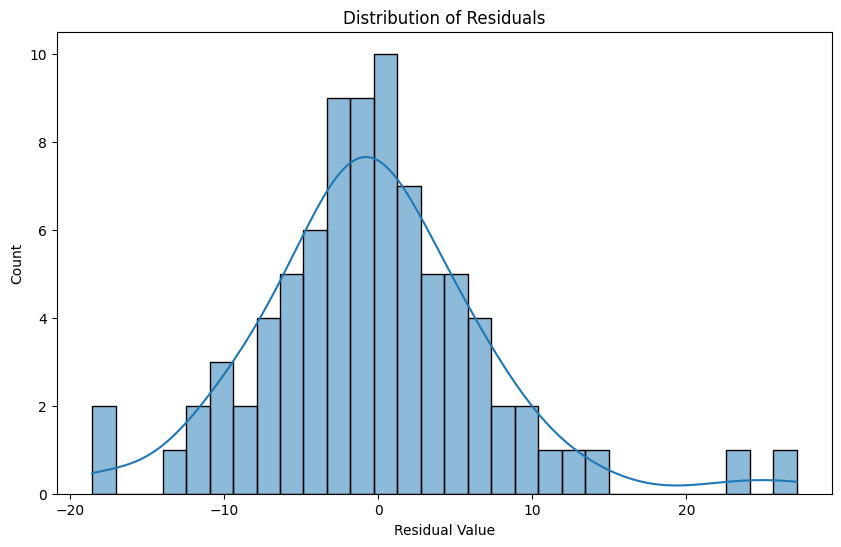

In [13]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.show()

## 6. Conclusions

Based on our analysis:
1. The model's R-squared score shows how well our features explain the variance in house prices
2. The most influential features can be identified from the coefficient values
3. The residual plot helps us understand the model's prediction errors
4. This model can be used to estimate house prices based on the given features